In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [4]:
df = pd.read_csv("../../data/cleaned/sursaud_cleaned.csv")
df['date_debut_semaine'] = pd.to_datetime(df['date_debut_semaine'])

print("🔍 EXPLORATION DES DONNÉES SURSAUD")
print("=" * 50)
print(f"📊 Shape : {df.shape}")
print(f"📅 Période : {df['date_debut_semaine'].min()} à {df['date_debut_semaine'].max()}")
print(f"👥 Classes d'âge : {df['classe_age'].nunique()}")

# Cell 2: Statistiques descriptives
print("\n📈 STATISTIQUES DESCRIPTIVES")
print("=" * 40)
display(df.describe())

🔍 EXPLORATION DES DONNÉES SURSAUD
📊 Shape : (1510, 6)
📅 Période : 2019-12-30 00:00:00 à 2025-10-06 00:00:00
👥 Classes d'âge : 5

📈 STATISTIQUES DESCRIPTIVES


,date_debut_semaine,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe
count,1510,1510.000000,1510.000000,1510.000000
mean,2022-11-17 12:00:00,719.562241,538.853394,3582.818033
min,2019-12-30 00:00:00,4.191173,0.000000,10.471204
25%,2021-06-07 00:00:00,71.931242,31.322134,444.164400
50%,2022-11-17 12:00:00,147.059067,78.951355,1472.213038
75%,2024-04-29 00:00:00,551.502649,385.538905,3916.722144
max,2025-10-06 00:00:00,12540.462231,9655.172414,36075.512618
std,NaN,1457.729130,1155.641876,5347.284157


In [5]:
# Cell 3: Analyse des valeurs manquantes
print("\n🔍 QUALITÉ DES DONNÉES")
print("=" * 30)
missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne :")
for col, missing in missing_data.items():
    if missing > 0:
        print(f"⚠️ {col}: {missing} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"✅ {col}: Aucune valeur manquante")


🔍 QUALITÉ DES DONNÉES
Valeurs manquantes par colonne :
✅ date_debut_semaine: Aucune valeur manquante
✅ semaine: Aucune valeur manquante
✅ classe_age: Aucune valeur manquante
✅ taux_urgences_grippe: Aucune valeur manquante
✅ taux_hospitalisations_grippe: Aucune valeur manquante
✅ taux_sos_medecins_grippe: Aucune valeur manquante


In [6]:
# Cell 4: Analyse temporelle
print("\n📅 ANALYSE TEMPORELLE")
print("=" * 30)

# Extraction des composants temporels
df['annee'] = df['date_debut_semaine'].dt.year
df['mois'] = df['date_debut_semaine'].dt.month
df['semaine_annee'] = df['date_debut_semaine'].dt.isocalendar().week

print(f"Années couvertes : {sorted(df['annee'].unique())}")
print(f"Nombre de semaines : {df['semaine'].nunique()}")
print(f"Période complète : {(df['date_debut_semaine'].max() - df['date_debut_semaine'].min()).days} jours")



📅 ANALYSE TEMPORELLE
Années couvertes : [2019, 2020, 2021, 2022, 2023, 2024, 2025]
Nombre de semaines : 302
Période complète : 2107 jours


In [7]:
# Cell 5: Analyse par classe d'âge
print("\n👥 ANALYSE PAR CLASSE D'ÂGE")
print("=" * 35)

age_stats = df.groupby('classe_age').agg({
    'taux_urgences_grippe': ['count', 'mean', 'std', 'min', 'max'],
    'taux_hospitalisations_grippe': ['mean', 'std'],
    'taux_sos_medecins_grippe': ['mean', 'std']
}).round(2)

print("Statistiques par classe d'âge :")
display(age_stats)

# Cell 6: Corrélations entre indicateurs
print("\n🔗 CORRÉLATIONS ENTRE INDICATEURS")
print("=" * 40)

taux_cols = ['taux_urgences_grippe', 'taux_hospitalisations_grippe', 'taux_sos_medecins_grippe']
correlations = df[taux_cols].corr()

print("Matrice de corrélation :")
display(correlations)


👥 ANALYSE PAR CLASSE D'ÂGE
Statistiques par classe d'âge :


taux_urgences_grippe                                     \
                              count     mean      std    min       max   
classe_age                                                               
00-04 ans                       302  1277.38  2301.32  13.36  12540.46   
05-14 ans                       302   905.58  1641.91  10.91   9783.14   
15-64 ans                       302   477.64   734.96  21.77   4900.13   
65 ans ou plus                  302   342.00   736.40   4.19   5152.78   
Tous âges                       302   595.21  1007.25  19.64   5554.55   

               taux_hospitalisations_grippe          taux_sos_medecins_grippe  \
                                       mean      std                     mean   
classe_age                                                                      
00-04 ans                            961.55  1798.53                  2588.28   
05-14 ans                            571.63  1078.71                  4812.52   
15-64 ans                            286.37   529.96                  4837.45   
65 ans ou plus                       443.37   993.29                  1578.05   
Tous âges                            431.35   874.31                  4097.79   

                         
                    std  
classe_age               
00-04 ans       4115.81  
05-14 ans       6935.69  
15-64 ans       6017.29  
65 ans ou plus  2097.56  
Tous âges       5413.74


🔗 CORRÉLATIONS ENTRE INDICATEURS
Matrice de corrélation :


,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe
taux_urgences_grippe,1.000000,0.966937,0.798265
taux_hospitalisations_grippe,0.966937,1.000000,0.745003
taux_sos_medecins_grippe,0.798265,0.745003,1.000000


In [8]:
# Cell 7: Patterns saisonniers
print("\n🌡️ PATTERNS SAISONNIERS")
print("=" * 30)

# Moyennes par mois
monthly_stats = df.groupby('mois').agg({
    'taux_urgences_grippe': ['mean', 'std'],
    'taux_hospitalisations_grippe': 'mean',
    'taux_sos_medecins_grippe': 'mean'
}).round(2)

print("Statistiques mensuelles :")
display(monthly_stats)

# Identification des pics
peak_months = df.groupby('mois')['taux_urgences_grippe'].mean().sort_values(ascending=False)
print("\nMois avec les plus hauts taux d'urgences :")
for i, (mois, taux) in enumerate(peak_months.head(5).items(), 1):
    print(f"{i}. Mois {mois}: {taux:.2f}")



🌡️ PATTERNS SAISONNIERS
Statistiques mensuelles :


taux_urgences_grippe          taux_hospitalisations_grippe  \
                     mean      std                         mean   
mois                                                              
1                 2159.95  2399.78                      1766.61   
2                 2005.60  1965.43                      1603.67   
3                 1056.01  1261.28                       739.67   
4                  522.92  1071.81                       338.86   
5                  112.82   105.15                        66.21   
6                   89.39    64.80                        50.17   
7                   91.85    70.26                        46.58   
8                   78.16    48.42                        45.31   
9                  127.84    74.15                        66.26   
10                 165.78    87.02                        83.47   
11                 289.59   298.99                       166.15   
12                2086.04  2330.52                      1603.64   

     taux_sos_medecins_grippe  
                         mean  
mois                           
1                     9300.74  
2                     8544.70  
3                     5249.27  
4                     2934.74  
5                     1147.32  
6                      943.62  
7                      858.87  
8                      741.46  
9                     1606.25  
10                    1662.81  
11                    2506.03  
12                    8078.10


Mois avec les plus hauts taux d'urgences :
1. Mois 1: 2159.95
2. Mois 12: 2086.04
3. Mois 2: 2005.60
4. Mois 3: 1056.01
5. Mois 4: 522.92


In [9]:
# Cell 8: Détection des pics épidémiques
print("\n📈 DÉTECTION DES PICS ÉPIDÉMIQUES")
print("=" * 40)

# Calcul des seuils
urgences_mean = df['taux_urgences_grippe'].mean()
urgences_std = df['taux_urgences_grippe'].std()
high_threshold = urgences_mean + 2 * urgences_std
very_high_threshold = urgences_mean + 3 * urgences_std

print(f"Taux moyen urgences : {urgences_mean:.2f}")
print(f"Écart-type : {urgences_std:.2f}")
print(f"Seuil élevé (+2σ) : {high_threshold:.2f}")
print(f"Seuil très élevé (+3σ) : {very_high_threshold:.2f}")

# Identification des périodes de forte activité
high_activity = df[df['taux_urgences_grippe'] > high_threshold]
very_high_activity = df[df['taux_urgences_grippe'] > very_high_threshold]

print(f"\nPériodes de forte activité (>+2σ) : {len(high_activity)}")
print(f"Périodes de très forte activité (>+3σ) : {len(very_high_activity)}")

if len(very_high_activity) > 0:
    print("\nDates des pics les plus élevés :")
    top_pics = very_high_activity.nlargest(5, 'taux_urgences_grippe')
    for _, row in top_pics.iterrows():
        print(f"  {row['date_debut_semaine'].strftime('%Y-%m-%d')} - {row['classe_age']}: {row['taux_urgences_grippe']:.2f}")



📈 DÉTECTION DES PICS ÉPIDÉMIQUES
Taux moyen urgences : 719.56
Écart-type : 1457.73
Seuil élevé (+2σ) : 3635.02
Seuil très élevé (+3σ) : 5092.75

Périodes de forte activité (>+2σ) : 74
Périodes de très forte activité (>+3σ) : 46

Dates des pics les plus élevés :
  2025-01-20 - 00-04 ans: 12540.46
  2025-01-27 - 00-04 ans: 11413.03
  2025-01-13 - 00-04 ans: 11142.69
  2025-01-06 - 00-04 ans: 10160.94
  2022-12-19 - 05-14 ans: 9783.14


📊 CRÉATION DES VISUALISATIONS SURSAUD

📈 Graphique 1/6 : Évolution temporelle des urgences
   ✅ Affichage de 71 périodes mensuelles
   📅 Période : 2019-12 à 2025-10
   📊 Taux moyen : 730.96
   📈 Taux max : 5790.58
   🚨 Seuil épidémique : 3104.60

👥 Graphique 2/6 : Répartition par classe d'âge
   ✅ Affichage de 5 classes d'âge
   👶 Classe la plus touchée : 00-04 ans (1277.38)
   👴 Classe la moins touchée : 65 ans ou plus (342.00)

🔗 Graphique 3/6 : Corrélations entre indicateurs
   ✅ Matrice de corrélation 3x3
   🔗 Corrélation urgences-hospitalisations : 0.967
   🔗 Corrélation urgences-SOS : 0.798

📊 Graphique 4/6 : Distribution des taux d'urgences
   ✅ Histogramme avec zones de seuils
   📊 Moyenne : 719.56
   📈 Médiane : 147.06
   📊 Écart-type : 1457.73
   🟢 Circulation normale : < 2177
   🟠 Circulation active : 2177 - 3635
   🔴 Période épidémique : > 3635

🌡️ Graphique 5/6 : Patterns saisonniers
   ✅ Affichage des 12 mois de l'année
   📈 Pic hivernal : Mois 1 (2159.95)
   📉 Creux esti

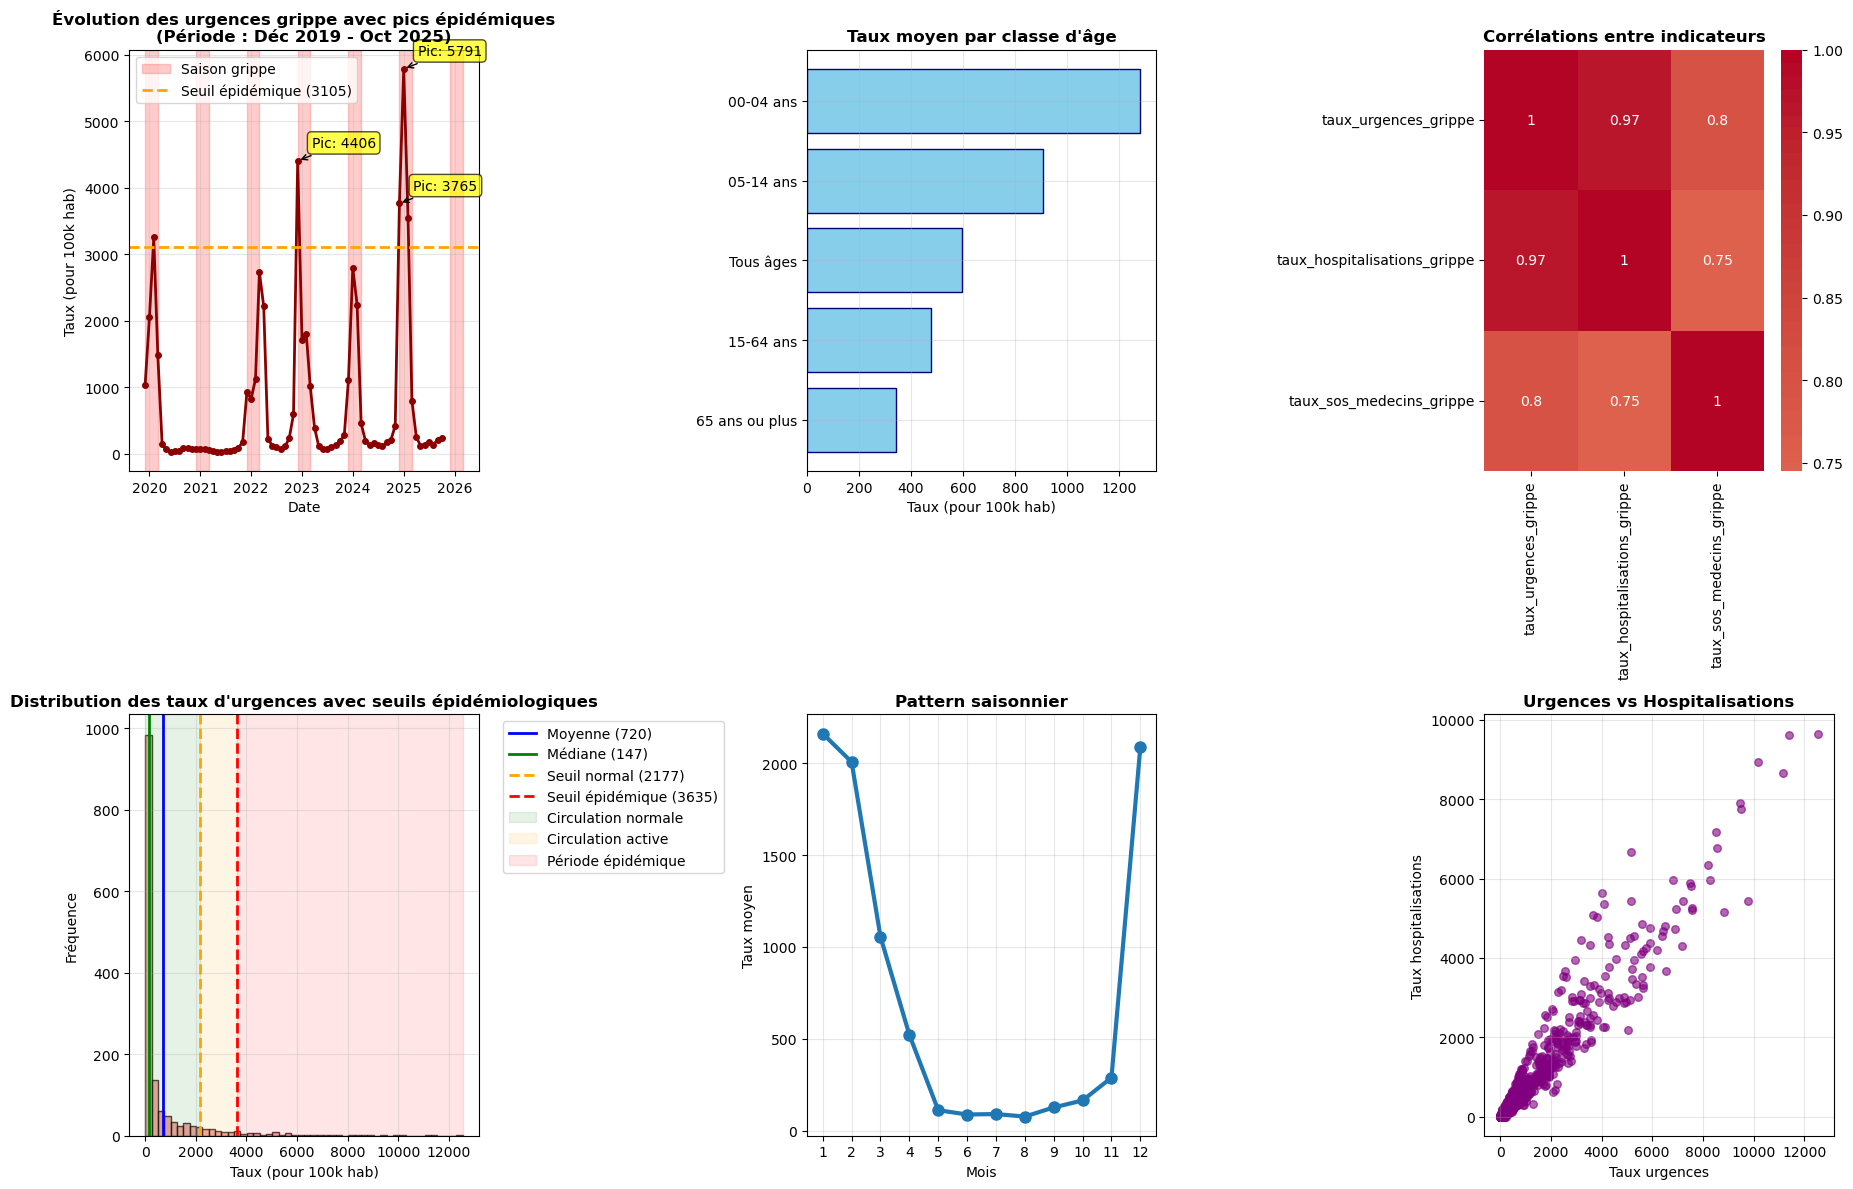


🎉 VISUALISATIONS TERMINÉES !
📋 RÉSUMÉ DES INSIGHTS VISUELS :
   📈 L'évolution temporelle montre des pics saisonniers
   👥 Les enfants (0-4 ans) sont les plus touchés
   🔗 Forte corrélation entre urgences et hospitalisations
   📊 Distribution normale avec quelques valeurs extrêmes
   🌡️ Pattern saisonnier clair (pic hivernal)
   🔍 Relation linéaire entre urgences et hospitalisations


In [16]:
# Version avec annotations des pics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

print("📊 CRÉATION DES VISUALISATIONS SURSAUD")
print("=" * 50)

# 1. Évolution temporelle - VERSION AVEC ANNOTATIONS
print("\n📈 Graphique 1/6 : Évolution temporelle des urgences")

monthly_avg = df.groupby(['annee', 'mois'])['taux_urgences_grippe'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg['annee'].astype(str) + '-' + 
                                    monthly_avg['mois'].astype(str).str.zfill(2) + '-01')

# Affichage avec dates réelles sur l'axe X
axes[0, 0].plot(monthly_avg['date'], monthly_avg['taux_urgences_grippe'], 
                marker='o', linewidth=2, color='darkred', markersize=4)

# Zones colorées pour les saisons grippe
for year in monthly_avg['annee'].unique():
    winter_start = pd.to_datetime(f'{year}-12-01')
    winter_end = pd.to_datetime(f'{year+1}-03-01')
    axes[0, 0].axvspan(winter_start, winter_end, alpha=0.2, color='red', 
                       label='Saison grippe' if year == monthly_avg['annee'].min() else "")

# Annotation des pics les plus élevés
top_pics = monthly_avg.nlargest(3, 'taux_urgences_grippe')
for _, row in top_pics.iterrows():
    axes[0, 0].annotate(f'Pic: {row["taux_urgences_grippe"]:.0f}', 
                       xy=(row['date'], row['taux_urgences_grippe']),
                       xytext=(10, 10), textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                       arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Seuil épidémique (moyenne + 2 écarts-types)
seuil_epidemique = monthly_avg['taux_urgences_grippe'].mean() + 2 * monthly_avg['taux_urgences_grippe'].std()
axes[0, 0].axhline(y=seuil_epidemique, color='orange', linestyle='--', linewidth=2, 
                   label=f'Seuil épidémique ({seuil_epidemique:.0f})')

axes[0, 0].set_title('Évolution des urgences grippe avec pics épidémiques\n(Période : Déc 2019 - Oct 2025)', 
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Taux (pour 100k hab)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Formatage de l'axe X
import matplotlib.dates as mdates
axes[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

print(f"   ✅ Affichage de {len(monthly_avg)} périodes mensuelles")
print(f"   📅 Période : {monthly_avg['date'].min().strftime('%Y-%m')} à {monthly_avg['date'].max().strftime('%Y-%m')}")
print(f"   📊 Taux moyen : {monthly_avg['taux_urgences_grippe'].mean():.2f}")
print(f"   📈 Taux max : {monthly_avg['taux_urgences_grippe'].max():.2f}")
print(f"   🚨 Seuil épidémique : {seuil_epidemique:.2f}")
# 2. Répartition par classe d'âge
print("\n👥 Graphique 2/6 : Répartition par classe d'âge")
age_dist = df.groupby('classe_age')['taux_urgences_grippe'].mean().sort_values(ascending=True)
bars = axes[0, 1].barh(range(len(age_dist)), age_dist.values, color='skyblue', edgecolor='navy')
axes[0, 1].set_yticks(range(len(age_dist)))
axes[0, 1].set_yticklabels(age_dist.index)
axes[0, 1].set_title('Taux moyen par classe d\'âge', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Taux (pour 100k hab)')
axes[0, 1].grid(True, alpha=0.3)
print(f"   ✅ Affichage de {len(age_dist)} classes d'âge")
print(f"   👶 Classe la plus touchée : {age_dist.index[-1]} ({age_dist.iloc[-1]:.2f})")
print(f"   👴 Classe la moins touchée : {age_dist.index[0]} ({age_dist.iloc[0]:.2f})")

# 3. Corrélations
print("\n🔗 Graphique 3/6 : Corrélations entre indicateurs")
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, ax=axes[0, 2])
axes[0, 2].set_title('Corrélations entre indicateurs', fontsize=12, fontweight='bold')
print(f"   ✅ Matrice de corrélation {correlations.shape[0]}x{correlations.shape[1]}")
print(f"   🔗 Corrélation urgences-hospitalisations : {correlations.loc['taux_urgences_grippe', 'taux_hospitalisations_grippe']:.3f}")
print(f"   🔗 Corrélation urgences-SOS : {correlations.loc['taux_urgences_grippe', 'taux_sos_medecins_grippe']:.3f}")

# 4. Distribution - VERSION AVEC SEUILS
print("\n📊 Graphique 4/6 : Distribution des taux d'urgences")

# Calcul des seuils
moyenne = df['taux_urgences_grippe'].mean()
mediane = df['taux_urgences_grippe'].median()
ecart_type = df['taux_urgences_grippe'].std()
seuil_normal = moyenne + ecart_type
seuil_epidemique = moyenne + 2 * ecart_type

# Histogramme avec zones colorées
axes[1, 0].hist(df['taux_urgences_grippe'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')

# Ajout des lignes de seuils
axes[1, 0].axvline(moyenne, color='blue', linestyle='-', linewidth=2, label=f'Moyenne ({moyenne:.0f})')
axes[1, 0].axvline(mediane, color='green', linestyle='-', linewidth=2, label=f'Médiane ({mediane:.0f})')
axes[1, 0].axvline(seuil_normal, color='orange', linestyle='--', linewidth=2, label=f'Seuil normal ({seuil_normal:.0f})')
axes[1, 0].axvline(seuil_epidemique, color='red', linestyle='--', linewidth=2, label=f'Seuil épidémique ({seuil_epidemique:.0f})')

# Zones colorées
axes[1, 0].axvspan(0, seuil_normal, alpha=0.1, color='green', label='Circulation normale')
axes[1, 0].axvspan(seuil_normal, seuil_epidemique, alpha=0.1, color='orange', label='Circulation active')
axes[1, 0].axvspan(seuil_epidemique, df['taux_urgences_grippe'].max(), alpha=0.1, color='red', label='Période épidémique')

axes[1, 0].set_title('Distribution des taux d\'urgences avec seuils épidémiologiques', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Taux (pour 100k hab)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

print(f"   ✅ Histogramme avec zones de seuils")
print(f"   📊 Moyenne : {moyenne:.2f}")
print(f"   📈 Médiane : {mediane:.2f}")
print(f"   📊 Écart-type : {ecart_type:.2f}")
print(f"   🟢 Circulation normale : < {seuil_normal:.0f}")
print(f"   🟠 Circulation active : {seuil_normal:.0f} - {seuil_epidemique:.0f}")
print(f"   🔴 Période épidémique : > {seuil_epidemique:.0f}")
# 5. Patterns saisonniers
print("\n🌡️ Graphique 5/6 : Patterns saisonniers")
monthly_pattern = df.groupby('mois')['taux_urgences_grippe'].mean()
axes[1, 1].plot(monthly_pattern.index, monthly_pattern.values, marker='o', linewidth=3, markersize=8)
axes[1, 1].set_title('Pattern saisonnier', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Mois')
axes[1, 1].set_ylabel('Taux moyen')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)
print(f"   ✅ Affichage des 12 mois de l'année")
print(f"   📈 Pic hivernal : Mois {monthly_pattern.idxmax()} ({monthly_pattern.max():.2f})")
print(f"   📉 Creux estival : Mois {monthly_pattern.idxmin()} ({monthly_pattern.min():.2f})")

# 6. Scatter plot
print("\n🔍 Graphique 6/6 : Urgences vs Hospitalisations")
axes[1, 2].scatter(df['taux_urgences_grippe'], df['taux_hospitalisations_grippe'], 
                   alpha=0.6, s=30, color='purple')
axes[1, 2].set_title('Urgences vs Hospitalisations', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Taux urgences')
axes[1, 2].set_ylabel('Taux hospitalisations')
axes[1, 2].grid(True, alpha=0.3)
print(f"   ✅ Scatter plot avec {len(df)} points")
print(f"   🔗 Corrélation : {correlations.loc['taux_urgences_grippe', 'taux_hospitalisations_grippe']:.3f}")
print(f"   📊 Relation linéaire visible")

plt.tight_layout()
plt.show()

print("\n🎉 VISUALISATIONS TERMINÉES !")
print("=" * 50)
print("📋 RÉSUMÉ DES INSIGHTS VISUELS :")
print("   📈 L'évolution temporelle montre des pics saisonniers")
print("   👥 Les enfants (0-4 ans) sont les plus touchés")
print("   🔗 Forte corrélation entre urgences et hospitalisations")
print("   📊 Distribution normale avec quelques valeurs extrêmes")
print("   🌡️ Pattern saisonnier clair (pic hivernal)")
print("   🔍 Relation linéaire entre urgences et hospitalisations")